# Clean Tweets Analysis

Tweets are scraped using the `baseline-user-ids.json` input (a list of User IDs) in `twitter_scraper.scrape`. To collect Tweets incrementally, the `scrape` module makes use of `since_id` and `max_id` paramaters issued by [Twitter API](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline).

All Tweets are filter by a given date interval, that is currently all Tweets from June 1st, 2022 (2022-06-01).


Tweets data schema:

Column                    | Description                                                           | Data Type
------------------------- | --------------------------------------------------------------------- | -------
id                        | Numeric Tweet identifier                                              | int64
created_at                | Date and time of Tweet creation                                       | datetime64[ns, UTC]
user_id                   | Tweet author                                                          | int64
full_text                 | Tweet full text                                                       | string
hashtags                  | Hashtags used in Tweet                                                | object
user_mentions             | Users mentioned in Tweet                                              | object
is_retweet                | Tweet is a Retweet                                                    | bool
retweet_created_at        | Date and time of Retweet creation                                     | datetime64[ns, UTC]
retweet_timedelta_sec     | Time elapsed between original Tweet and Retweet creation              | Int64 (nullable)
retweet_from_user_id      | Retweet author                                                        | Int64 (nullable)
retweet_from_tweet_id     | Numeric Retweet identifier                                            | Int64 (nullable)
is_reply                  | Tweet is a reply to another Tweet                                     | bool
in_reply_to_status_id     | Original Tweet ID if this Tweet is a reply                            | Int64 (nullable)
in_reply_to_user_id       | Original Tweet's User ID if this Tweet is a reply                     | Int64 (nullable)
is_quote_status           | Tweet is a quote                                                      | bool
favorite_count            | Number of times a Tweet was favorited (liked)                         | int64
possibly_sensitive        | Tweet contains sensitive content                                      | bool
week                      | Month of Tweet creation                                               | string
month                     | Week of Tweet creation                                                | string
langid                    | Tweet language                                                        | string

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style

mpl.style.use('seaborn-v0_8-darkgrid')
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
from preproc import ANALYSIS_COLUMNS

import datetime as dt
import pandas as pd

USER_DISPLAY_NAME = 'screen_name'
ANALYSIS_START_DATE = dt.datetime.fromisoformat('2022-11-01T00:00:00+00:00')
ANALYSIS_END_DATE = dt.datetime.fromisoformat('2022-11-30T23:59:59+00:00')

users = pd.read_csv('preproc_users_view.csv')
tweets_view = pd.read_csv('preproc_tweets_view.csv', parse_dates=['created_at'])
tweets_view = tweets_view[
    (tweets_view.created_at >= ANALYSIS_START_DATE)
    & (tweets_view.created_at <= ANALYSIS_END_DATE)
]

users_view = users[users.user_id.isin(tweets_view.user_id.unique())].copy()

users_view = users_view[ANALYSIS_COLUMNS['users']]
tweets_view = tweets_view[ANALYSIS_COLUMNS['tweets'] + ['user_id', 'screen_name', 'followers_count', 'friends_count']]

users_view['hashtags'] = users_view['hashtags'].map(eval)
users_view['original_hashtags'] = users_view['original_hashtags'].map(eval)
users_view['retweet_hashtags'] = users_view['retweet_hashtags'].map(eval)
users_view['quote_hashtags'] = users_view['quote_hashtags'].map(eval)

tweets_view['hashtags'] = tweets_view['hashtags'].map(eval)
tweets_view['original_hashtags'] = tweets_view['original_hashtags'].map(eval)
tweets_view['retweet_hashtags'] = tweets_view['retweet_hashtags'].map(eval)
tweets_view['quote_hashtags'] = tweets_view['quote_hashtags'].map(eval)

# users_view['user_mentions'] = users_view['user_mentions'].map(eval)
# users_view['original_user_mentions'] = users_view['original_user_mentions'].map(eval)
# users_view['retweet_user_mentions'] = users_view['retweet_user_mentions'].map(eval)
# users_view['quote_user_mentions'] = users_view['quote_user_mentions'].map(eval)

# tweets_view['user_mentions'] = tweets_view['user_mentions'].map(eval)
# tweets_view['original_user_mentions'] = tweets_view['original_user_mentions'].map(eval)
# tweets_view['retweet_user_mentions'] = tweets_view['retweet_user_mentions'].map(eval)
# tweets_view['quote_user_mentions'] = tweets_view['quote_user_mentions'].map(eval)

stats_df = pd.DataFrame(
    [
        '{:,}'.format(len(users[users.is_croatian == True])),
        '{:,}'.format(len(users_view)),
        '{:,}'.format(len(tweets_view)),
        
        '{0:.2f}%'.format(100*(tweets_view['is_original'].sum() / (tweets_view['is_original'].sum() + tweets_view['is_retweet'].sum()))),
        '{0:.2f}%'.format(100*(tweets_view['is_retweet'].sum() / (tweets_view['is_original'].sum() + tweets_view['is_retweet'].sum()))),
        '{:,}'.format(tweets_view['is_reply'].sum()),
        '{:,}'.format(tweets_view['is_quote'].sum()),
        
        tweets_view.created_at.min(),
        tweets_view.created_at.max()

    ],
    index=[
        "Croatian Users (global) #",
        "Croatian Users (tweets) #",
        "Tweets #",
        
        "Original %",
        "Reweets %",
        "Replies #",
        "Quotes #",
        
        "Earliest Tweet date",
        "Latest Tweet date"
    ],
    columns=['Tweets Data']
)

stats_df

,Tweets Data
Croatian Users (global) #,"32,328"
Croatian Users (tweets) #,"6,608"
Tweets #,"367,262"
Original %,68.81%
Reweets %,31.19%
Replies #,"155,653"
Quotes #,"23,085"
Earliest Tweet date,2022-11-01 00:00:12+00:00
Latest Tweet date,2022-11-30 23:59:52+00:00


In [5]:
tweets_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367262 entries, 0 to 833563
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   id                          367262 non-null  int64              
 1   full_text                   367262 non-null  object             
 2   created_at                  367262 non-null  datetime64[ns, UTC]
 3   year                        367262 non-null  int64              
 4   quarter                     367262 non-null  int64              
 5   quarter_name                367262 non-null  object             
 6   month                       367262 non-null  int64              
 7   month_name                  367262 non-null  object             
 8   week                        367262 non-null  int64              
 9   week_name                   367262 non-null  object             
 10  day                         367262 non-null 

## Interpreting Croatian User Tweets

[Twitter API (user_timeline)](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline) contains limitations that disrupt some Analysis performed in "Clean Tweets Analysis". One limitation is that Twitter only allows collecting up to 3,200 of a user's most recent Tweets - making it ambiguous to analyse which users tweet the most in the collected Tweets network. Considreing this limitation, the "Clean Tweets Analysis" focuses on results that show information relations, rather than information quantity. 

To provide support for the listed limitation, the Data Ingestion pipeline is ran bi-weekly, assuming that a user will not post more than 3,200 tweets in a 2-week window. This assumption is analysed by providing a question:

* What is the maximum number of tweets per user in a 2-week window?

The "Clean Tweets Analysis" aims to create questions and provide answers based on a subset of available information (columns):

Column(s)                           | Questions
----------------------------------- | ----------------------------------------------
hashtags                            | - What are the most frequently used hashtags on a monthly basis?
hashtags + user_id                  | - What hashtags are linked to a user on average in total? <br> - What hashtags are linked to a user on average on a monthly basis?
user_mentions                       | - Who are the most frequently mentioned users on a monthly basis?
is_retweet + hashtags               | - What hashtags are used in retweets against original tweets in total? <br> - How do retweet hashtags correlate to original tweet hashtags?
is_retweet + user_id                | - What is the ratio between retweets and original tweets per top 10 tweeters on a monthly basis?
is_reply + is_retweet               | - What is the ratio between retweets, replies and original tweets?
is_reply + hashtags                 | - What hashtags are used in replies against original tweets in total? <br> - How do reply hashtags correlate to original tweet hashtags?
is_reply + user_id                  | - What is the ratio between replies and original tweets per top 10 tweeters on a monthly basis?
favorite_count + user_id            | - What users have the most favorite count in total? <br> - What users have the most favorite count on a monthly basis?
favorite_count + hashtags           | - What hashtags have the most favorite count in total? <br> - What hashtags have the most favorite count on a monthly basis?
retweet_timedelta_sec               | - What is the average retweet_timedelta_sec?
retweet_timedelta_sec + user_id     | - What users retweet the fastest?
retweet_timedelta_sec + hashtags    | - What hashtags are retweeted the fastest?

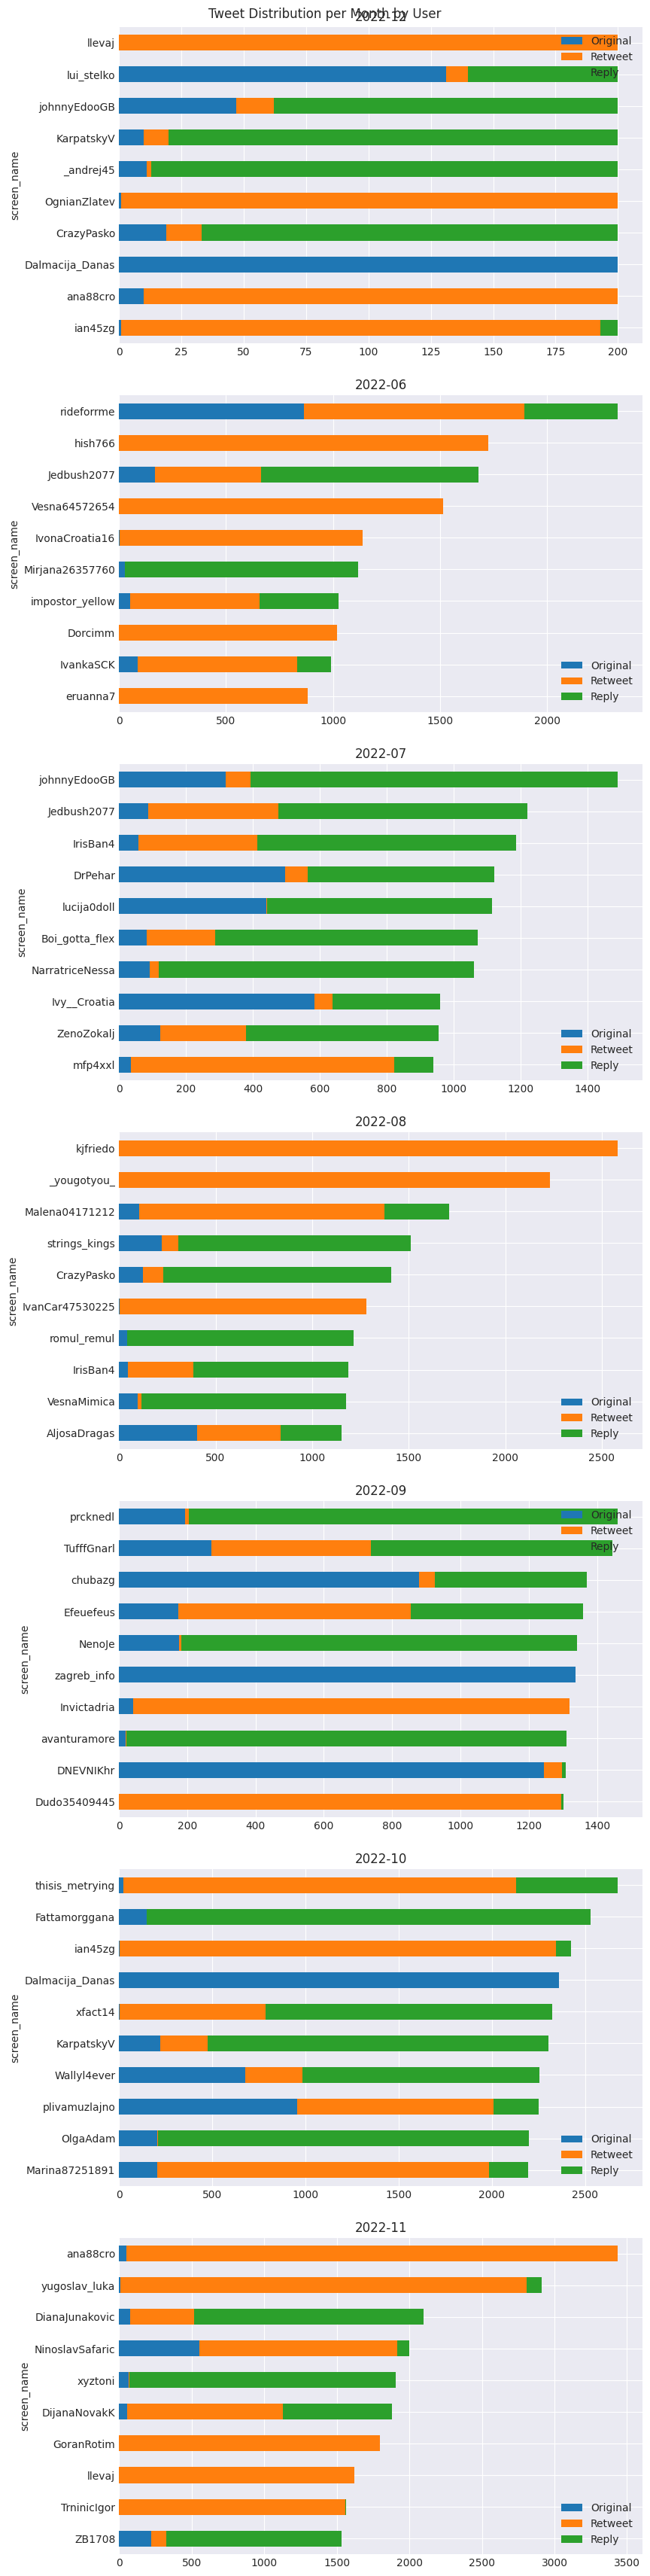

In [5]:
top = 10
unique_months = tweets_view.month_name.unique()
fig, axs = plt.subplots(len(unique_months), figsize=(9, len(unique_months) * 5), squeeze=False)

plt.suptitle('Tweet Distribution per Month by User')

top_tweeters = tweets_view[[
    'id', 'month_name', 'screen_name', 'is_retweet', 'is_reply', 'is_quote', 'followers_count'
]].groupby(['month_name', 'screen_name']).agg(
    total_out_tweets_cnt=('id', 'size'),
    out_retweet_tweets_cnt=('is_retweet', 'sum'),
    reply_tweets_cnt=('is_reply', 'sum'),
    quote_tweets_cnt=('is_quote', 'sum')
)
top_tweeters['out_original_tweets_cnt'] = top_tweeters['total_out_tweets_cnt'] - (
    top_tweeters['out_retweet_tweets_cnt'] + top_tweeters['reply_tweets_cnt']
)
max_tweets = top_tweeters['total_out_tweets_cnt'].max()

for i, month in enumerate(unique_months[::-1]):

    gdf = top_tweeters.loc[month].sort_values('total_out_tweets_cnt')
    gdf[['out_original_tweets_cnt', 'out_retweet_tweets_cnt', 'reply_tweets_cnt']].tail(top).rename(
        columns={
            'out_original_tweets_cnt': 'Original',
            'out_retweet_tweets_cnt': 'Retweet',
            'reply_tweets_cnt': 'Reply'
        }
    ).plot.barh(ax=axs[i][0], stacked=True)
    axs[i][0].set_title(month)
    axs[i][0].set_xlim(xmin=0)

fig.tight_layout(pad=2)
plt.show()


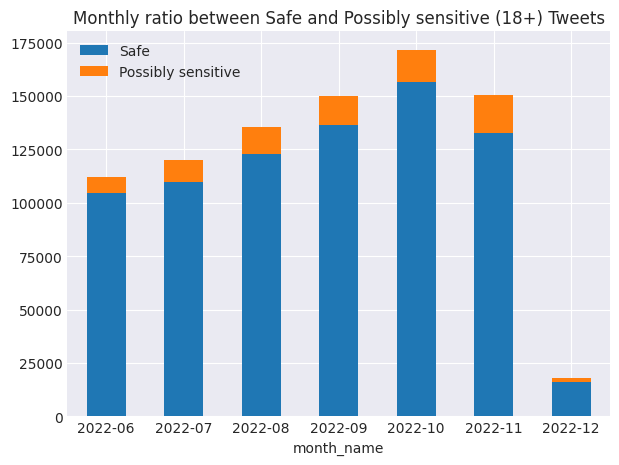

In [11]:
fig, ax = plt.subplots(1, figsize=(len(unique_months), 5))

tweets_df_pivot = tweets_view[['month_name', 'possibly_sensitive', 'id']].pivot_table(index='month_name', columns=['possibly_sensitive'], aggfunc=len)
tweets_df_pivot.plot.bar(ax=ax, rot=0, stacked=True)

ax.set_title('Monthly ratio between Safe and Possibly sensitive (18+) Tweets')
ax.legend(['Safe', 'Possibly sensitive'])
plt.show()

# Favorites

In [9]:
favorites_view = tweets_view.groupby(['month_name', 'screen_name', 'possibly_sensitive']).agg(
    tweets_num=('id', 'size'),
    favorite_count=('original_favorite_count', 'sum'),
    original_hashtags=('original_hashtags', 'sum')
)
favorites_view

tweets_num  favorite_count  \
month_name screen_name  possibly_sensitive                               
2022-06    01Cro        True                        22             135   
           0212biker    False                       23             129   
           0408zzzz     False                        2               1   
           09Nenad      False                       51             294   
           0viking0VR   False                        5               4   
...                                                ...             ...   
2022-12    zorankrusvar False                        1               7   
           zrinkav      False                        1               0   
           zvonimirVK   False                        3               0   
           zvoono       False                        1               0   
           zwoone       False                       24               0   

                                                                            original_hashtags  
month_name screen_name  possibly_sensitive                                                     
2022-06    01Cro        True                [gayporn, gaytwink, cro01, daddytwink, onlyfan...  
           0212biker    False               [opcaopasnost, hgss, opcaopasnot, IMAX, cinestar]  
           0408zzzz     False                                                              []  
           09Nenad      False                                                              []  
           0viking0VR   False               [illustration, digitalart, morning, messerschm...  
...                                                                                       ...  
2022-12    zorankrusvar False                                                              []  
           zrinkav      False                                                              []  
           zvonimirVK   False                                                              []  
           zvoono       False                                                              []  
           zwoone       False               [writerslift, writerslift, writerslift, writer...  

[34785 rows x 3 columns]

## possibly_sensitive + favorite_count
  - What kind of content has most favorite counts?

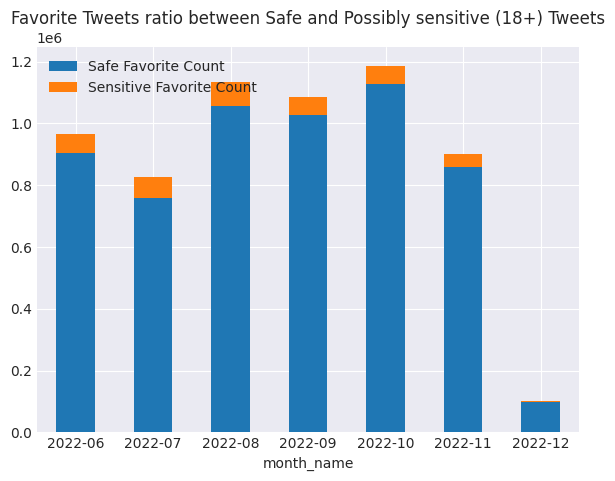

In [12]:
title = 'Favorite Tweets ratio between Safe and Possibly sensitive (18+) Tweets'

ax = favorites_view.groupby(['month_name', 'possibly_sensitive']).agg(
    favorite_count=('favorite_count', 'sum')
).reset_index().pivot(
    index='month_name', 
    columns=['possibly_sensitive']
).plot.bar(stacked=True, title=title, rot=0, figsize=(len(unique_months), 5))
ax.legend(['Safe Favorite Count', 'Sensitive Favorite Count'], title=None)
plt.show()

## month + user_id + favorite_count
  - What users have the most favorite count in total?

In [13]:
import ipywidgets as widgets
from ipywidgets import GridspecLayout

top = 20
title = 'Top {} Users with most Favorite Count in Total'.format(top)

gdf = favorites_view.groupby('screen_name').agg(
    favorite_count=('favorite_count', 'sum')
).sort_values('favorite_count', ascending=False).rename(
            columns={'favorite_count': 'Favorite Count'}
        )

out_box1 = widgets.Output(layout={"border":"1px solid green"})
out_box2 = widgets.Output(layout={"border":"1px solid green"})

with out_box1:
    ax = gdf.head(top)[::-1].plot.barh(rot=0, title=title, figsize=(6, 10))
    ax.set_ylabel(None)
    plt.show()
    
with out_box2:
    pd.set_option('display.max_colwidth', 180)
    display(
        gdf.join(users_view[['screen_name', 'name', 'description']].set_index('screen_name')).rename(
            columns={'description': 'Description', 'name': 'Name'}
        )[['Name', 'Description', 'Favorite Count']].head(top)
    )


grid = GridspecLayout(1, 10)
grid[:, 0:4] = out_box1
grid[:, 4:10] = out_box2

display(grid)

GridspecLayout(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', …

- What kind of communities are people with a greater number of favorites sorrounded with?

  - What users have the most favorite count on a monthly basis?

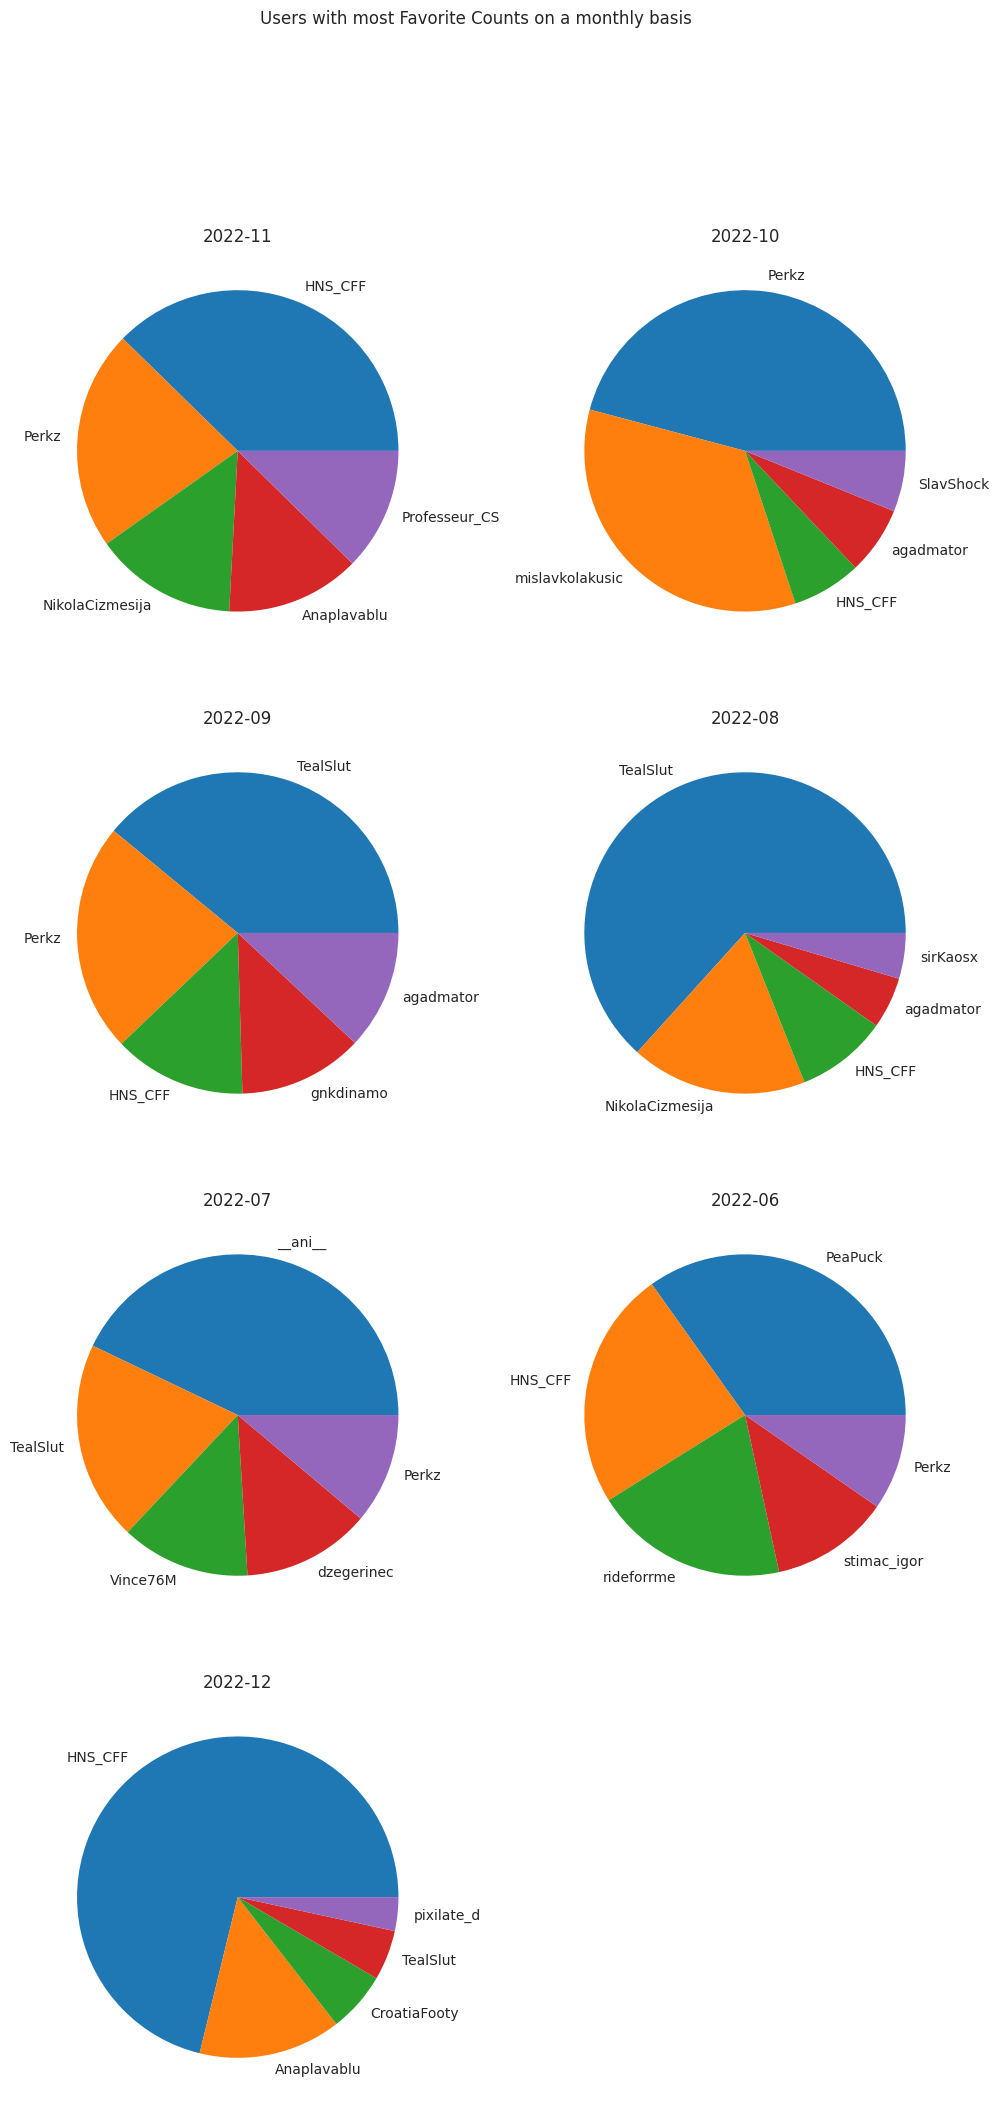

In [14]:
from math import ceil

ncols = 2
nrows = ceil(len(unique_months)/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*6, nrows*6), squeeze=False)

plt.suptitle('Users with most Favorite Counts on a monthly basis')

gdf = favorites_view.groupby(['month_name', 'screen_name']).agg(
    favorite_count=('favorite_count', 'sum')
).sort_values(['month_name', 'favorite_count'], ascending=False).rename(
    columns={'favorite_count': 'Favorite Count'}
)

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1

    gdf.loc[month].head(5).plot(kind='pie', y='Favorite Count', ax=axs[i][j], legend=None)
    axs[i][j].set_title(month)
    axs[i][j].set_ylabel(None)
    
    j += 1

plt.axis('off')
plt.show()

- How does the number of favorites change through time as the user gets more followers?

## month + favorite_count + hashtags
  - What hashtags have the most favorite count in total?
  - What hashtags have the most favorite count on a monthly basis?

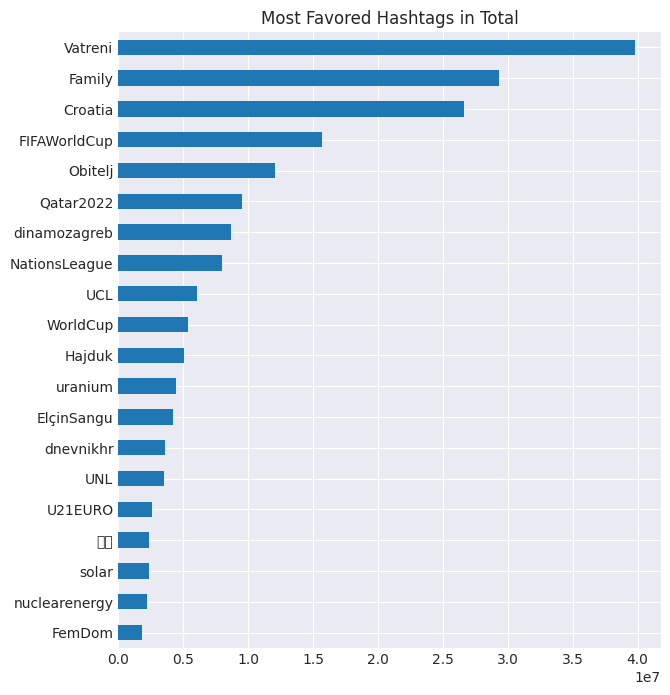

In [15]:
import warnings
warnings.filterwarnings('ignore')

ax = favorites_view[['favorite_count', 'original_hashtags']].explode(
    ['original_hashtags']
).dropna().groupby('original_hashtags').agg(
    favorite_count=('favorite_count', 'sum')
).sort_values('favorite_count', ascending=False).head(20)[::-1] \
 .plot(kind='barh', y='favorite_count', legend=None, figsize=(7, 8))

ax.set_ylabel(None)
ax.set_title('Most Favored Hashtags in Total')
plt.show()

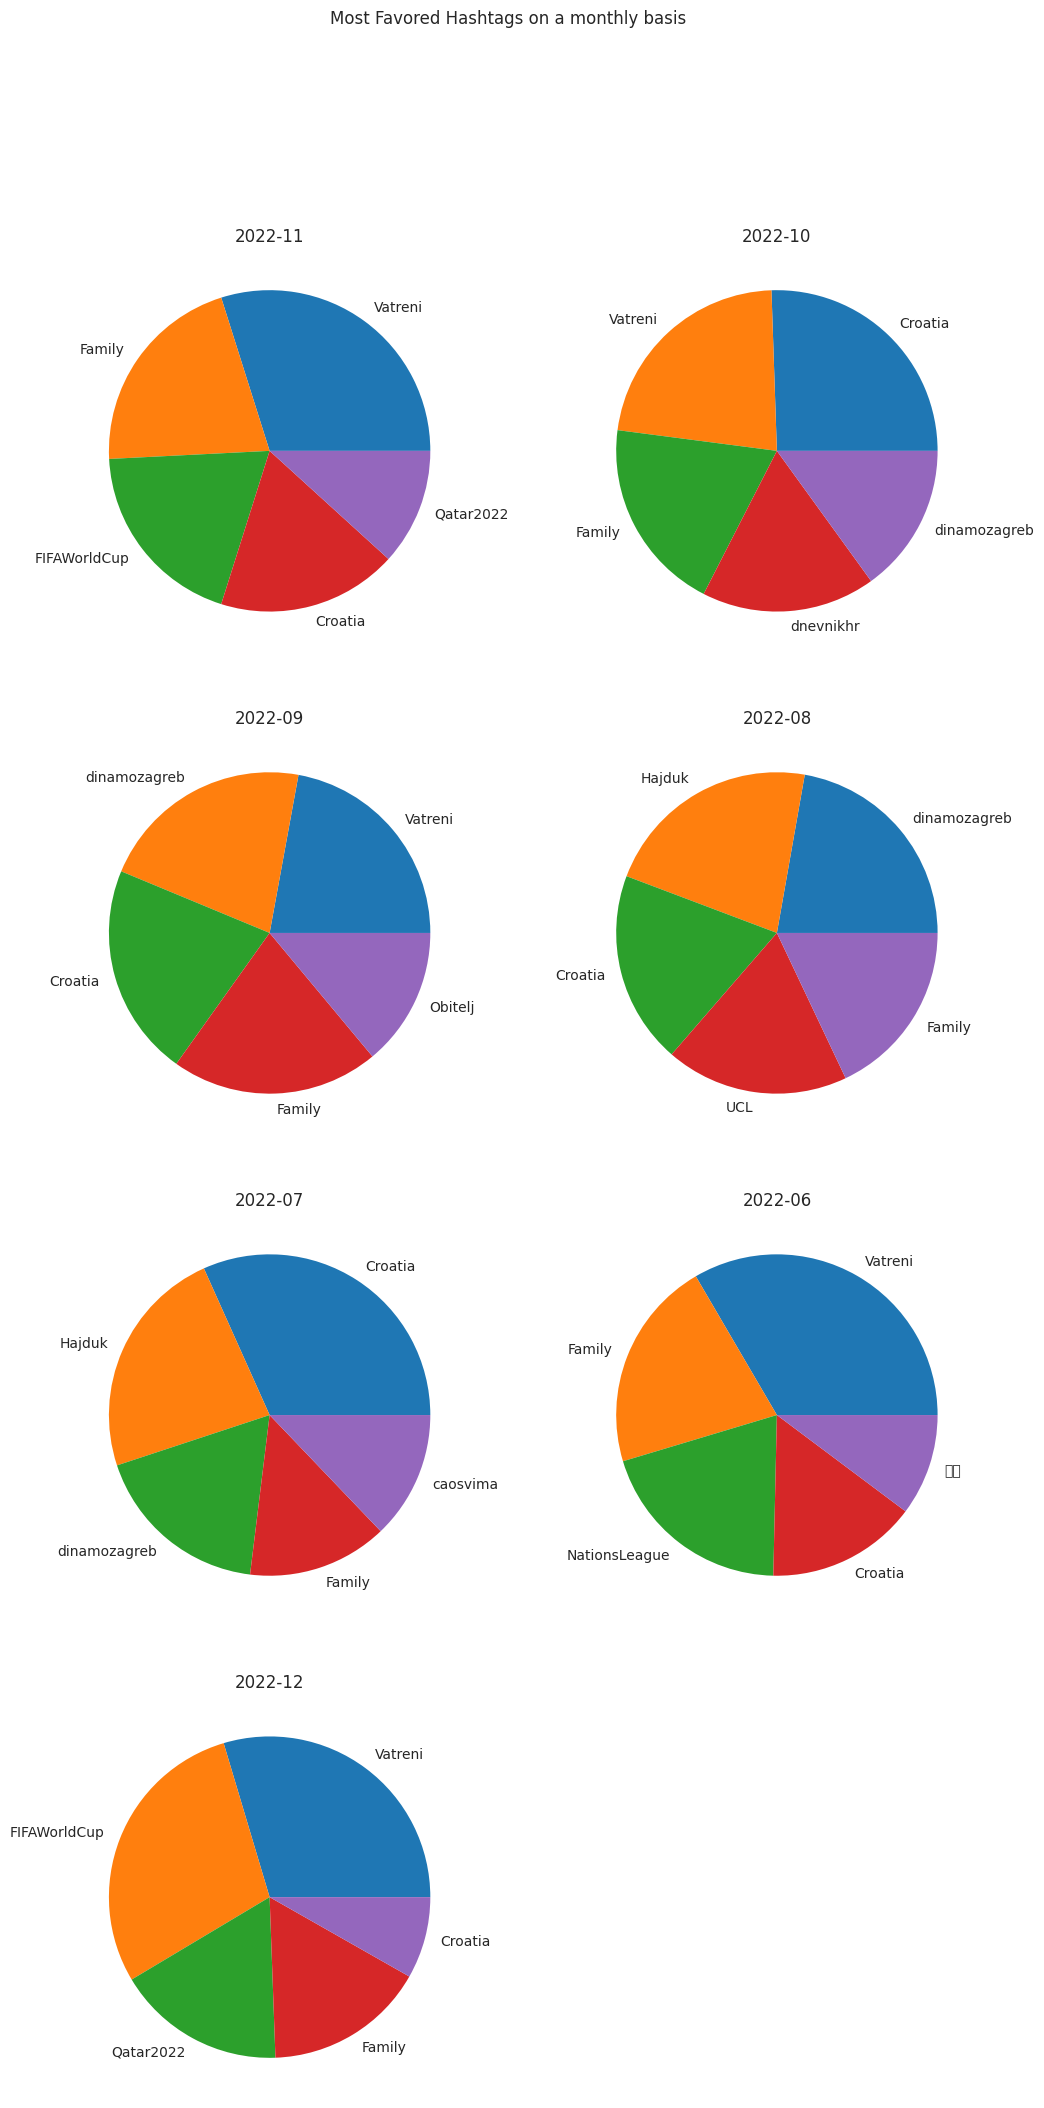

In [16]:
ncols = 2
nrows = ceil(len(unique_months) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)
plt.suptitle('Most Favored Hashtags on a monthly basis')

gdf = favorites_view[['favorite_count', 'original_hashtags']].explode(
    ['original_hashtags']
).dropna().groupby(['month_name', 'original_hashtags']).agg(
    favorite_count=('favorite_count', 'sum')
).sort_values(['month_name', 'favorite_count'], ascending=False).rename(
    columns={'favorite_count': 'Favorite Count'}
)

max_favorite_count = max(gdf['Favorite Count']) + 10000

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1

    gdf.loc[month].head(5).plot(kind='pie', y='Favorite Count', ax=axs[i][j], legend=None)
    axs[i][j].set_title(month)
    axs[i][j].set_ylabel(None)
    
    j += 1

plt.axis('off')
plt.show()

# Hashtags

In [25]:
hashtags_view = tweets_view[['id', 'screen_name', 'year', 'month', 'original_hashtags', 'is_original', 'is_retweet', 'is_reply', 'is_quote', 'original_favorite_count']] \
    .explode('original_hashtags').rename(columns={'original_hashtags': 'hashtags', 'original_favorite_count': 'favorite_count'}).dropna()
hashtags_view.sample(10)

,id,screen_name,year,month,hashtags,is_original,is_retweet,is_reply,is_quote,favorite_count
2082748,1575241258187907072,amicanov,2022,9,starryaifeatured,True,False,False,False,0
243384,1568950797097992195,Visit_Dubrovnik,2022,9,travel,True,False,False,False,0
248462,1578741047810674693,LikeZadar,2022,10,FeelZadar,True,False,False,False,2
252043,1547568373831127040,lokalnahrvatska,2022,7,vijesti,True,False,False,False,0
1935903,1542091230804336640,DentelliC,2022,6,dentistry,True,False,False,False,0
150594,1583740303915511808,RitamBalkana,2022,10,officialvideo,True,False,False,False,0
1181920,1581292276667781120,MarkoLohert,2022,10,Linux,True,False,True,False,3
1454233,1596779171321372673,FranjoMaricic,2022,11,autumn,True,False,False,False,0
527030,1548993484589187072,danas_hr,2022,7,matura,True,False,False,False,0
1260319,1533043460592308224,Franko53507461,2022,6,y2k,True,False,False,False,20


## month + hashtags
- What are the most frequently used hashtags in total? How are they distributed in retweets, replies and original tweets?


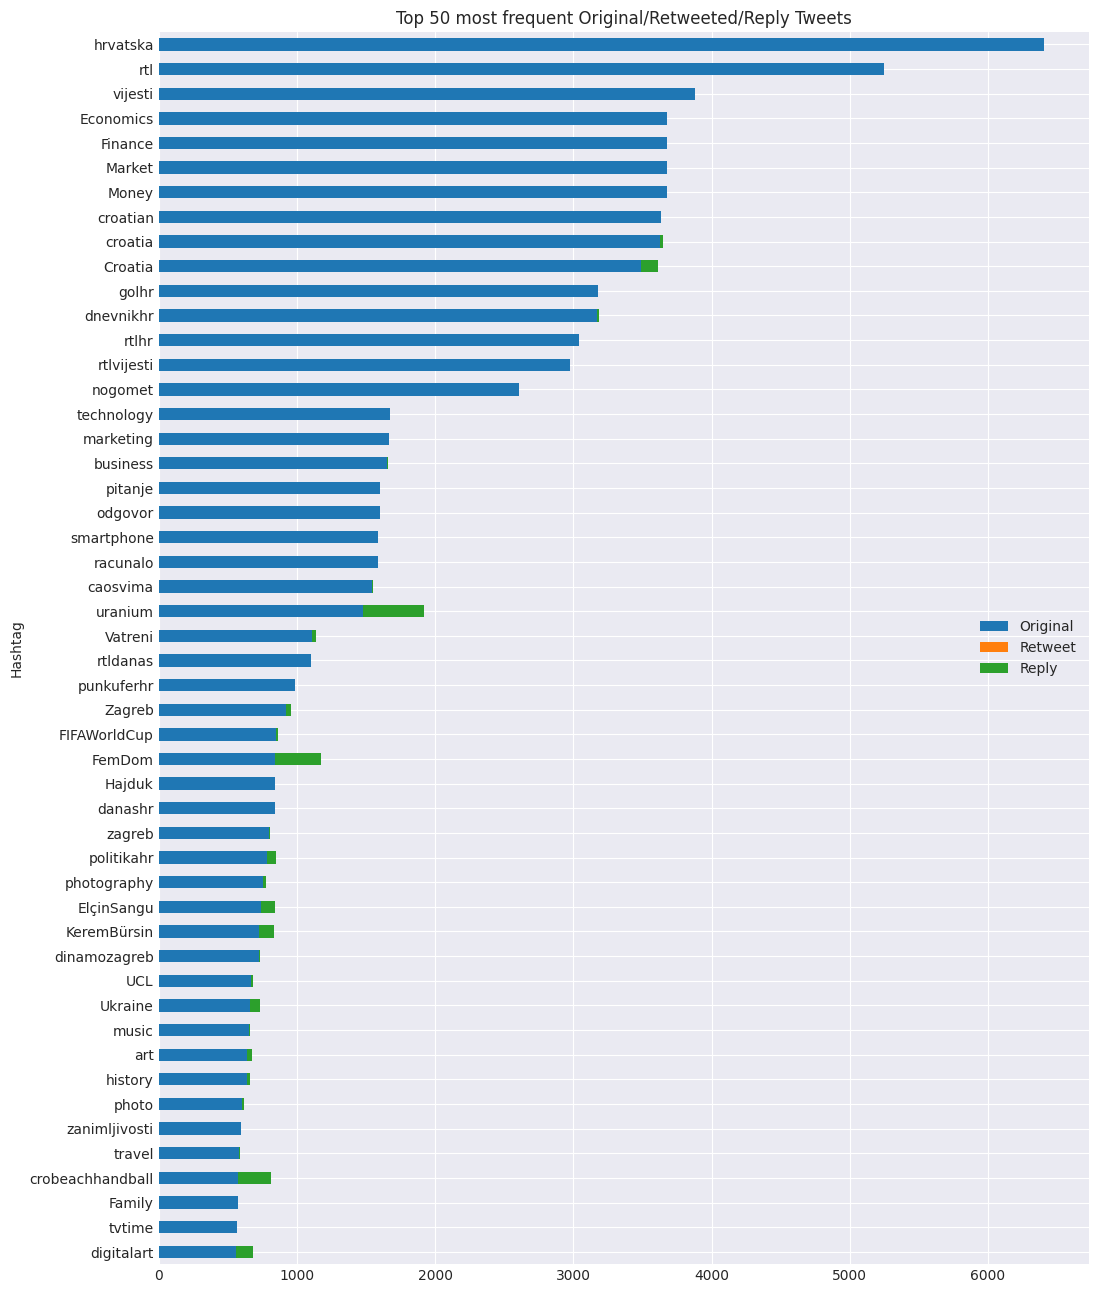

In [26]:
agg_hashtags_view = hashtags_view.groupby('hashtags').agg(
    total=('hashtags', 'size'),
    is_original=('is_original', 'sum'),
    is_retweet=('is_retweet', 'sum'),
    is_reply=('is_reply', 'sum')
).sort_values('total', ascending=False)
agg_hashtags_view['original'] = agg_hashtags_view['total'] - (agg_hashtags_view['is_retweet'] + agg_hashtags_view['is_reply'])

ax = agg_hashtags_view[['is_original', 'is_retweet', 'is_reply']].rename(columns={
  'is_original': 'Original',
  'is_retweet': 'Retweet',
  'is_reply': 'Reply'
}).head(50)[::-1].plot.barh(stacked=True, figsize=(12, 16))

ax.set_title('Top 50 most frequent Original/Retweeted/Reply Tweets')
ax.set_ylabel("Hashtag")
ax.legend(loc='center right')
plt.show()

- What are the most frequently used hashtags on a monthly basis? How are they distributed in retweets, replies and original tweets?

In [27]:
month_hashtags_view = hashtags_view.groupby(['year', 'month', 'hashtags']).agg(
    favorite_count=('favorite_count', 'sum'),
    total=('hashtags', 'size'),
    is_original=('is_original', 'sum'),
    is_retweet=('is_retweet', 'sum'),
    is_reply=('is_reply', 'sum')
).sort_values(['year', 'month', 'total'], ascending=False)
month_hashtags_view

favorite_count  total  is_original  is_retweet  \
year month hashtags                                                           
2022 12    FIFAWorldCup               26867    216          216           0   
           Vatreni                    26045    147          147           0   
           hrvatska                     381    121          121           0   
           Qatar2022                  17356    108          108           0   
           Croatia                     8816    100          100           0   
...                                     ...    ...          ...         ...   
     6     우리의여름엔_언제나_셔누가있어               4      1            1           0   
           투모로우바이투게더                      0      1            1           0   
           𝐎𝐥𝐲𝐦𝐩𝐢𝐜𝐃𝐚𝐲                     5      1            1           0   
           𝗦𝗶𝗻𝘀𝗮𝘆                         0      1            1           0   
           𝗧𝗼𝗺𝗧𝗮𝗶𝗹𝗼𝗿                      0      1            1           0   

                             is_reply  
year month hashtags                    
2022 12    FIFAWorldCup             2  
           Vatreni                 12  
           hrvatska                 0  
           Qatar2022                1  
           Croatia                  4  
...                               ...  
     6     우리의여름엔_언제나_셔누가있어         0  
           투모로우바이투게더                0  
           𝐎𝐥𝐲𝐦𝐩𝐢𝐜𝐃𝐚𝐲               0  
           𝗦𝗶𝗻𝘀𝗮𝘆                   0  
           𝗧𝗼𝗺𝗧𝗮𝗶𝗹𝗼𝗿                0  

[97258 rows x 5 columns]

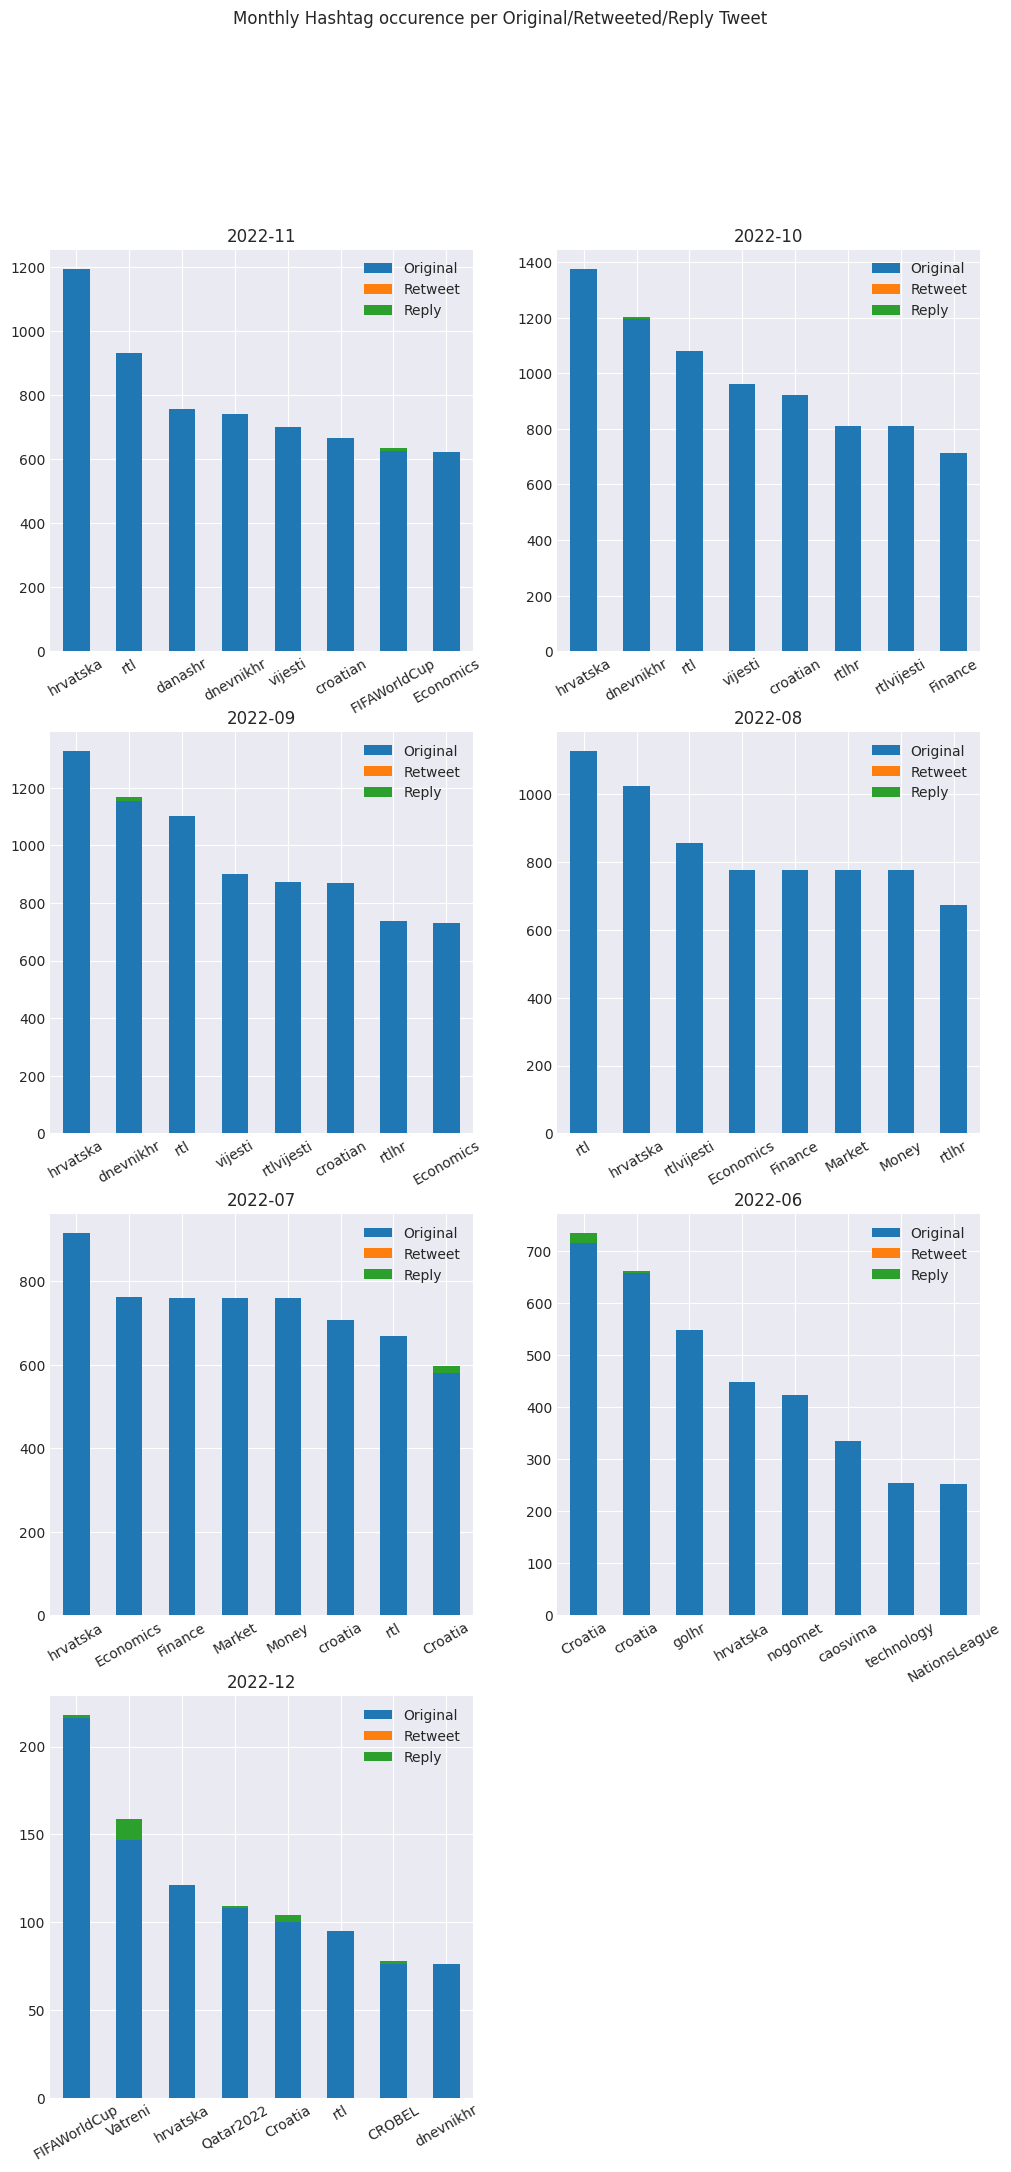

In [28]:
ncols = 2
nrows = ceil(len(unique_months) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)
plt.suptitle("Monthly Hashtag occurence per Original/Retweeted/Reply Tweet")

month_hashtags = month_hashtags_view[['is_original', 'is_retweet', 'is_reply']].rename(columns={
    'is_original': 'Original',
    'is_retweet': 'Retweet',
    'is_reply': 'Reply'
})

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1
    
    year, mon = tuple(map(int, month.split('-')))
    plot_df = month_hashtags.loc[(year, mon)]
    plot_df.head(8).plot.bar(ax=axs[i][j], stacked=True, rot=30)
    axs[i][j].set_title(month)
    # ax.set_ylabel(month)
    axs[i][j].set_xlabel(None)
    
    j += 1

if len(unique_months) % ncols != 0:
    plt.axis('off')
plt.show()

In [29]:
def get_hashtags_groupby(df, groupby=['hashtags', 'year', 'month', 'screen_name']):
    hashtags_groupby = df.groupby(groupby).agg(
        favorite_count=('favorite_count', 'sum'),
        is_original=('is_original', 'sum'), 
        is_retweet=('is_retweet', 'sum'), 
        is_reply=('is_reply', 'sum'),
        user_hashtag_cnt=('screen_name', 'size')
    )

    gdf = hashtags_groupby.copy()
    gdf['total_hashtag_cnt'] = gdf['is_original'] + gdf['is_retweet']
    gdf['user_hashtag_pct'] = gdf['user_hashtag_cnt'] / gdf['total_hashtag_cnt']
    gdf['avg_user_hashtag_pct'] = gdf.index.to_series().apply(lambda x: gdf.loc[(x[0], x[1], x[2]), 'user_hashtag_pct'].mean())
    return gdf.sort_index()

# hashtags_user_month_groupby = get_hashtags_groupby(hashtags_view, ['hashtags', 'screen_name', 'year', 'mon'])
# hashtags_user_month_groupby[hashtags_user_month_groupby['user_hashtag_pct'] != 1].sort_values('is_retweet', ascending=False).head(30)
hashtags_groupby = get_hashtags_groupby(hashtags_view, ['hashtags', 'year', 'month', 'screen_name'])
#hashtags_groupby.loc[(hashtags_groupby.index.get_level_values('hashtags').isin(('SlavaUkraini', 'hrvatska', 'dnevnikhr')), slice(None))][180:240].head(60)#.sort_values('user_hashtag_pct', ascending=False).head(30)
hashtags_groupby

favorite_count  is_original  \
hashtags       year month screen_name                                    
02academy      2022 7     RadioLabin                    2            1   
05_جويلية_1962 2022 7     AmineKhelif                  62            1   
0800DEVOPS     2022 7     croz_hr                       1            1   
                    9     croz_hr                       9            2   
                    10    croz_hr                       8            2   
...                                                   ...          ...   
𝗦𝗶𝗻𝘀𝗮𝘆         2022 6     PortanovaOsijek               0            1   
𝗦𝗽𝗼𝗿𝘁𝗙𝗲𝘀𝘁      2022 10    hrv_olimp_odbor              18            6   
𝗧𝗼𝗺𝗧𝗮𝗶𝗹𝗼𝗿      2022 6     PortanovaOsijek               0            1   
𝗮𝗱𝗶𝗱𝗮𝘀         2022 8     PortanovaOsijek               0            1   
𝙘𝙧𝙤𝙝𝙖𝙣𝙙𝙗𝙖𝙡𝙡    2022 11    HRStwitt                      3            1   

                                           is_retweet  is_reply  \
hashtags       year month screen_name                             
02academy      2022 7     RadioLabin                0         0   
05_جويلية_1962 2022 7     AmineKhelif               0         0   
0800DEVOPS     2022 7     croz_hr                   0         0   
                    9     croz_hr                   0         0   
                    10    croz_hr                   0         0   
...                                               ...       ...   
𝗦𝗶𝗻𝘀𝗮𝘆         2022 6     PortanovaOsijek           0         0   
𝗦𝗽𝗼𝗿𝘁𝗙𝗲𝘀𝘁      2022 10    hrv_olimp_odbor           0         0   
𝗧𝗼𝗺𝗧𝗮𝗶𝗹𝗼𝗿      2022 6     PortanovaOsijek           0         0   
𝗮𝗱𝗶𝗱𝗮𝘀         2022 8     PortanovaOsijek           0         0   
𝙘𝙧𝙤𝙝𝙖𝙣𝙙𝙗𝙖𝙡𝙡    2022 11    HRStwitt                  0         0   

                                           user_hashtag_cnt  \
hashtags       year month screen_name                         
02academy      2022 7     RadioLabin                      1   
05_جويلية_1962 2022 7     AmineKhelif                     1   
0800DEVOPS     2022 7     croz_hr                         1   
                    9     croz_hr                         2   
                    10    croz_hr                         2   
...                                                     ...   
𝗦𝗶𝗻𝘀𝗮𝘆         2022 6     PortanovaOsijek                 1   
𝗦𝗽𝗼𝗿𝘁𝗙𝗲𝘀𝘁      2022 10    hrv_olimp_odbor                 6   
𝗧𝗼𝗺𝗧𝗮𝗶𝗹𝗼𝗿      2022 6     PortanovaOsijek                 1   
𝗮𝗱𝗶𝗱𝗮𝘀         2022 8     PortanovaOsijek                 1   
𝙘𝙧𝙤𝙝𝙖𝙣𝙙𝙗𝙖𝙡𝙡    2022 11    HRStwitt                        1   

                                           total_hashtag_cnt  \
hashtags       year month screen_name                          
02academy      2022 7     RadioLabin                       1   
05_جويلية_1962 2022 7     AmineKhelif                      1   
0800DEVOPS     2022 7     croz_hr                          1   
                    9     croz_hr                          2   
                    10    croz_hr                          2   
...                                                      ...   
𝗦𝗶𝗻𝘀𝗮𝘆         2022 6     PortanovaOsijek                  1   
𝗦𝗽𝗼𝗿𝘁𝗙𝗲𝘀𝘁      2022 10    hrv_olimp_odbor                  6   
𝗧𝗼𝗺𝗧𝗮𝗶𝗹𝗼𝗿      2022 6     PortanovaOsijek                  1   
𝗮𝗱𝗶𝗱𝗮𝘀         2022 8     PortanovaOsijek                  1   
𝙘𝙧𝙤𝙝𝙖𝙣𝙙𝙗𝙖𝙡𝙡    2022 11    HRStwitt                         1   

                                           user_hashtag_pct  \
hashtags       year month screen_name                         
02academy      2022 7     RadioLabin                    1.0   
05_جويلية_1962 2022 7     AmineKhelif                   1.0   
0800DEVOPS     2022 7     croz_hr                       1.0   
                    9     croz_hr                       1.0   
                    10    croz_hr                       1.0   
...                                                     ...   
𝗦𝗶𝗻𝘀𝗮𝘆         2022 6     PortanovaOsijek          

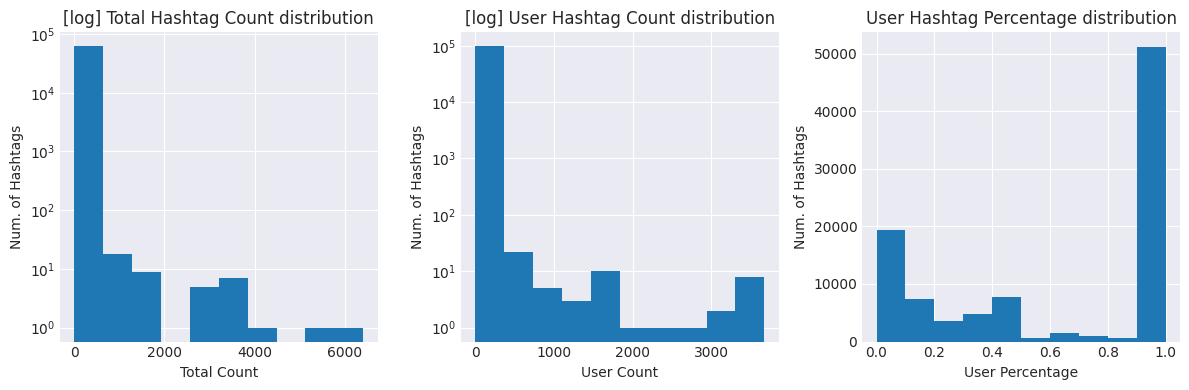

In [30]:
nrows = 1
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))

total_hashtags = hashtags_groupby.groupby('hashtags').agg(
    total_hashtag_cnt=('user_hashtag_cnt', 'sum')
)

user_hashtags = hashtags_groupby.groupby(['hashtags', 'screen_name']).agg(
    user_hashtag_cnt=('user_hashtag_cnt', 'sum')
)

total_hashtag_cnt_view = user_hashtags.groupby('hashtags').sum()
user_hashtags['total_hashtag_cnt'] = user_hashtags.index.to_series().apply(lambda x: total_hashtag_cnt_view.loc[x[0]])
user_hashtags['user_hashtag_pct'] = user_hashtags['user_hashtag_cnt'] / user_hashtags['total_hashtag_cnt']


total_hashtags.total_hashtag_cnt.hist(ax=axs[0], log=True)
axs[0].set_title('[log] Total Hashtag Count distribution')
axs[0].set_ylabel('Num. of Hashtags')
axs[0].set_xlabel('Total Count')
user_hashtags.user_hashtag_cnt.hist(ax=axs[1], log=True)
axs[1].set_title('[log] User Hashtag Count distribution')
axs[1].set_ylabel('Num. of Hashtags')
axs[1].set_xlabel('User Count')
user_hashtags.user_hashtag_pct.hist(ax=axs[2])
axs[2].set_title('User Hashtag Percentage distribution')
axs[2].set_ylabel('Num. of Hashtags')
axs[2].set_xlabel('User Percentage')

plt.tight_layout()
plt.show()

In [34]:
def normalize_hashtags_groupby(hashtags_gby):
    hashtags_gby['user_hashtag_cnt'] = hashtags_gby.apply(lambda row: 1 if row.user_hashtag_pct > 0.5 else row.user_hashtag_cnt, axis=1)
    hashtags_gby['is_retweet'] = hashtags_gby.apply(lambda row: 1 if row.user_hashtag_pct > 0.5 and row.is_retweet > 0 else row.is_retweet, axis=1)
    hashtags_gby['is_reply'] = hashtags_gby.apply(lambda row: 1 if row.user_hashtag_pct > 0.5 and row.is_reply > 0 else row.is_reply, axis=1)
    hashtags_gby['total_hashtag_cnt'] = hashtags_gby['is_original'] + hashtags_gby['is_reply']
    
    hashtags_gby['user_hashtag_pct'] = hashtags_gby['user_hashtag_cnt'] / hashtags_gby['total_hashtag_cnt']
    hashtags_gby['avg_user_hashtag_pct'] = hashtags_gby.index.to_series().apply(
        lambda x: hashtags_gby.loc[(x[0], x[1], x[2]), 'user_hashtag_pct'].mean()
    )
    return hashtags_gby


hashtags_groupby_1 = normalize_hashtags_groupby(hashtags_groupby)
# hashtags_groupby_1 = normalize_hashtags_groupby(hashtags_groupby_1)

In [35]:
print("Hashtags per User, mean before transform: ", hashtags_groupby.user_hashtag_cnt.mean())
print("Hashtags per User, mean after transform: ", hashtags_groupby_1.user_hashtag_cnt.mean())

Hashtags per User, mean before transform:  1.0
Hashtags per User, mean after transform:  1.0


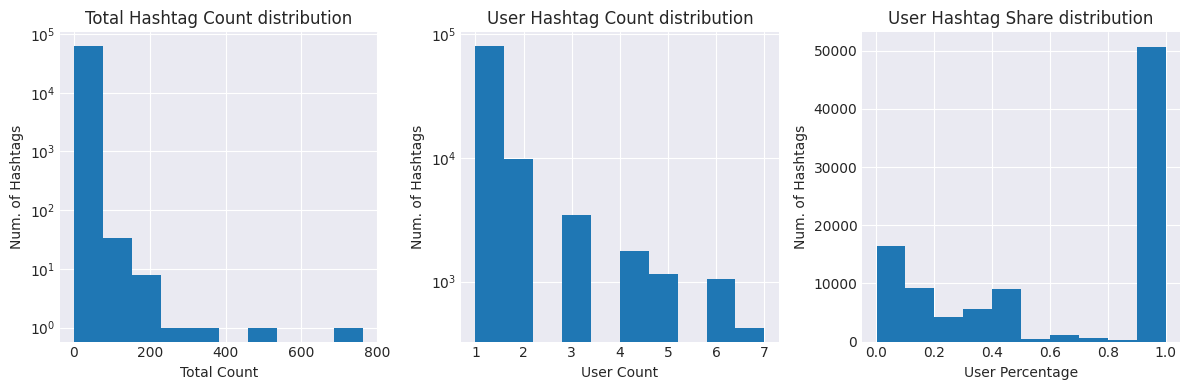

In [36]:
nrows = 1
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))

total_hashtags = hashtags_groupby_1.groupby('hashtags').agg(
    total_hashtag_cnt=('user_hashtag_cnt', 'sum'),
    original_hashtag_cnt=('is_original', 'sum'),
    retweet_hashtag_cnt=('is_retweet', 'sum'),
    reply_hashtag_cnt=('is_reply', 'sum')
)

user_hashtags = hashtags_groupby_1.groupby(['hashtags', 'screen_name']).agg(
    user_hashtag_cnt=('user_hashtag_cnt', 'sum')
)

total_hashtag_cnt_view = user_hashtags.groupby('hashtags').sum()
user_hashtags['total_hashtag_cnt'] = user_hashtags.index.to_series().apply(lambda x: total_hashtag_cnt_view.loc[x[0]])
user_hashtags['user_hashtag_pct'] = user_hashtags['user_hashtag_cnt'] / user_hashtags['total_hashtag_cnt']


total_hashtags.total_hashtag_cnt.hist(ax=axs[0], log=True)
axs[0].set_title('Total Hashtag Count distribution')
axs[0].set_ylabel('Num. of Hashtags')
axs[0].set_xlabel('Total Count')
user_hashtags.user_hashtag_cnt.hist(ax=axs[1], log=True)
axs[1].set_title('User Hashtag Count distribution')
axs[1].set_ylabel('Num. of Hashtags')
axs[1].set_xlabel('User Count')
user_hashtags.user_hashtag_pct.hist(ax=axs[2])
axs[2].set_title('User Hashtag Share distribution')
axs[2].set_ylabel('Num. of Hashtags')
axs[2].set_xlabel('User Percentage')

plt.tight_layout()
plt.show()

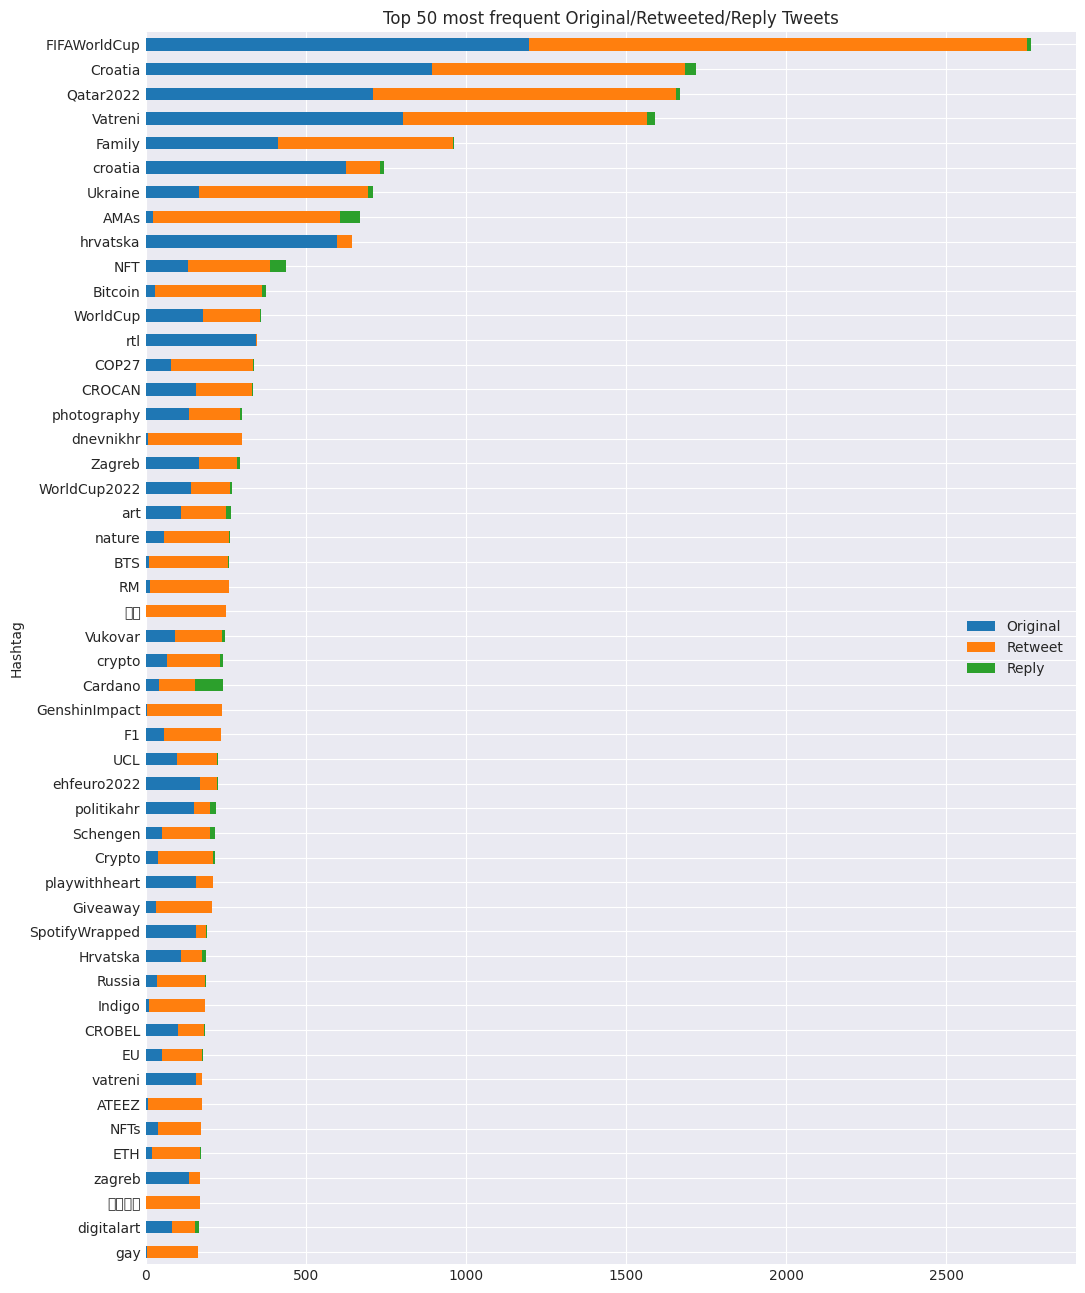

In [29]:
agg_hashtags_view = total_hashtags.sort_values('total_hashtag_cnt', ascending=False)
ax = agg_hashtags_view[['original_hashtag_cnt', 'retweet_hashtag_cnt', 'reply_hashtag_cnt']].rename(columns={
  'original_hashtag_cnt': 'Original',
  'retweet_hashtag_cnt': 'Retweet',
  'reply_hashtag_cnt': 'Reply'
}).head(50)[::-1].plot.barh(stacked=True, figsize=(12, 16))

ax.set_title('Top 50 most frequent Original/Retweeted/Reply Tweets')
ax.set_ylabel("Hashtag")
ax.legend(loc='center right')
plt.show()

## month + hashtags
  - What are the most frequently used hashtags on a monthly basis?

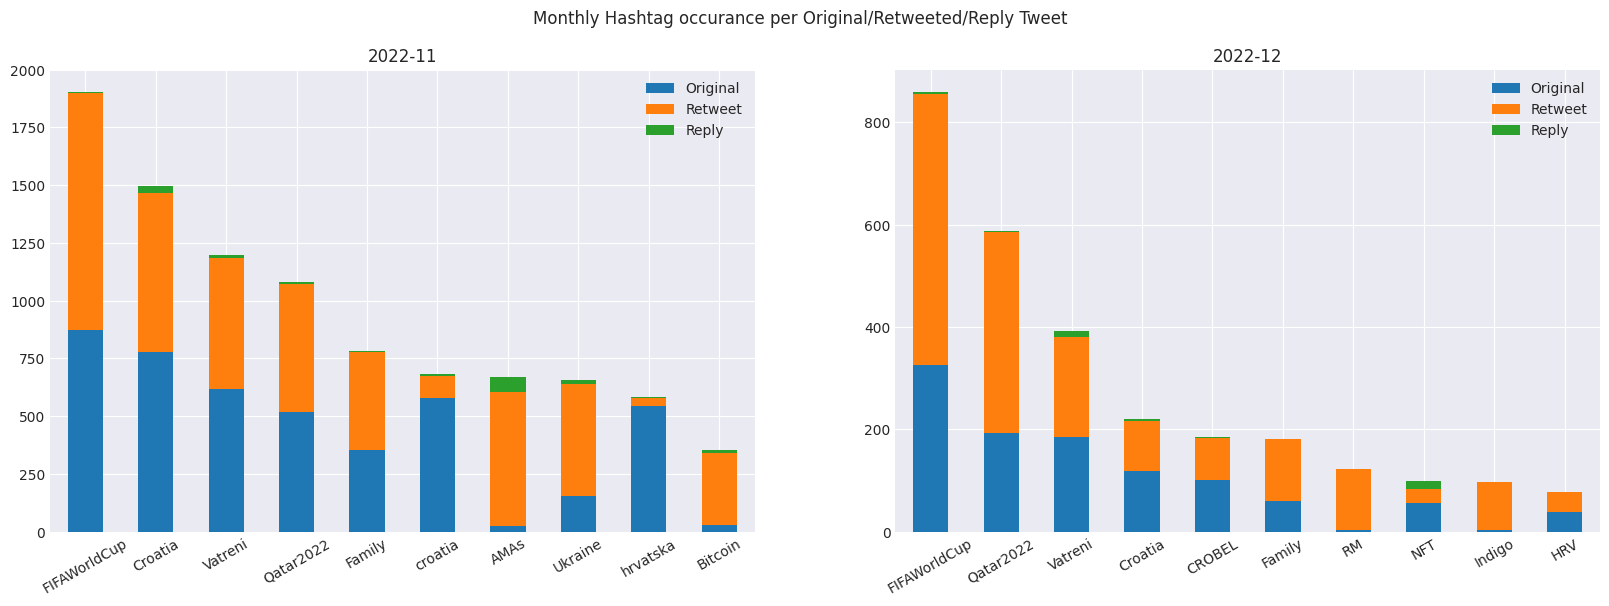

In [30]:
ncols = 2
nrows = ceil(len(unique_months) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*6), squeeze=False)
plt.suptitle("Monthly Hashtag occurance per Original/Retweeted/Reply Tweet")

month_hashtags = hashtags_groupby_1.groupby(['year', 'month', 'hashtags']).agg(
    total_hashtag_cnt=('user_hashtag_cnt', 'sum'),
    retweet_hashtag_cnt=('is_retweet', 'sum'),
    reply_hashtag_cnt=('is_reply', 'sum')
).sort_values('total_hashtag_cnt', ascending=False)
month_hashtags['original_hashtag_cnt'] = month_hashtags['total_hashtag_cnt'] - (month_hashtags['retweet_hashtag_cnt'] + month_hashtags['reply_hashtag_cnt'])

month_hashtags = month_hashtags[['original_hashtag_cnt', 'retweet_hashtag_cnt', 'reply_hashtag_cnt']].rename(columns={
    'original_hashtag_cnt': 'Original',
    'retweet_hashtag_cnt': 'Retweet',
    'reply_hashtag_cnt': 'Reply'
})

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1
    
    year, mon = tuple(map(int, month.split('-')))
    plot_df = month_hashtags.loc[(year, mon)]
    plot_df.head(10).plot.bar(ax=axs[i][j], stacked=True, rot=30)
    axs[i][j].set_title(month)
    # ax.set_ylabel(month)
    axs[i][j].set_xlabel(None)
    j += 1

if len(unique_months) % 2 != 0:
    plt.axis('off')
plt.show()

## hashtags + user_id
  - What hashtags are linked to a user on average in total?
  - What hashtags are linked to a user on average on a monthly basis?

In [31]:
month_hashtags['Total'] = month_hashtags['Original'] + month_hashtags['Retweet'] + month_hashtags['Reply']

wordcloud_dict = {}
for year, mon, hashtag in month_hashtags.index:
    key = "{}-{}".format(year, str(mon).zfill(2))
    if key not in wordcloud_dict:
        wordcloud_dict[key] = []
    # print(year, mon, hashtag, month_hashtags.loc[(year, mon, hashtag), 'Total'])
    wordcloud_dict[key].append('{} '.format(hashtag) * int(month_hashtags.loc[(year, mon, hashtag), 'Total']))
wordcloud_dict = {key: " ".join(value) for key, value in wordcloud_dict.items()}

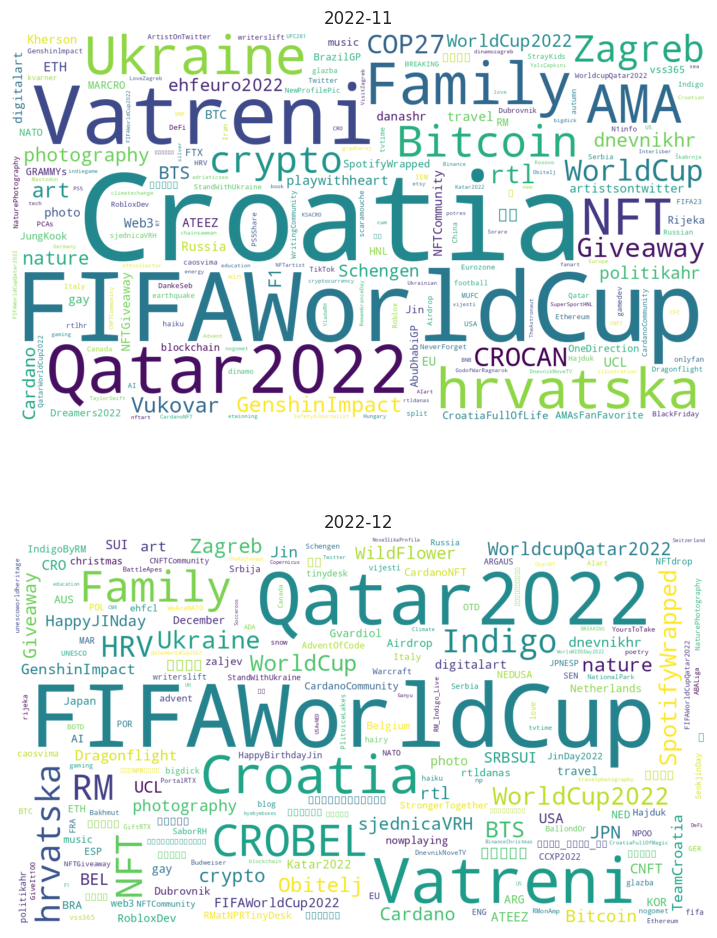

In [35]:
from wordcloud import WordCloud

fig, axs = plt.subplots(len(unique_months), figsize=(9, len(unique_months)*6), squeeze=False)

for i, month in enumerate(unique_months):
    wordcloud = WordCloud(collocations=False, background_color='white', width=1280, height=720, margin=10).generate(wordcloud_dict[month])
    axs[i][0].imshow(wordcloud, interpolation='bilinear')
    axs[i][0].set_title(month)
    axs[i][0].axis('off')
plt.show()

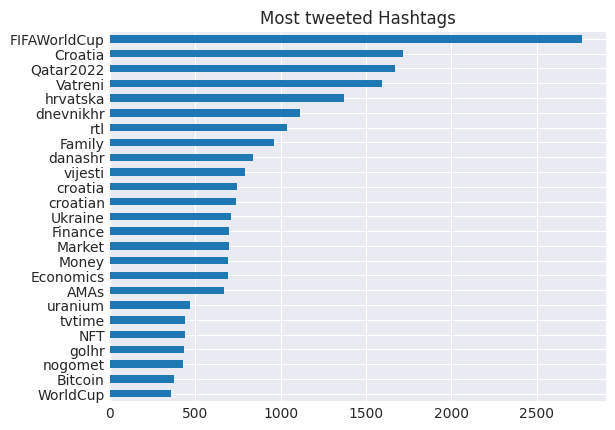

In [37]:
fig, ax = plt.subplots(1, figsize=None)

htag_count = tweets_view['all_hashtags'].explode().dropna().value_counts()
htag_count.head(25).iloc[::-1].plot.barh(ax=ax)

ax.set_title('Most tweeted Hashtags')
plt.show()

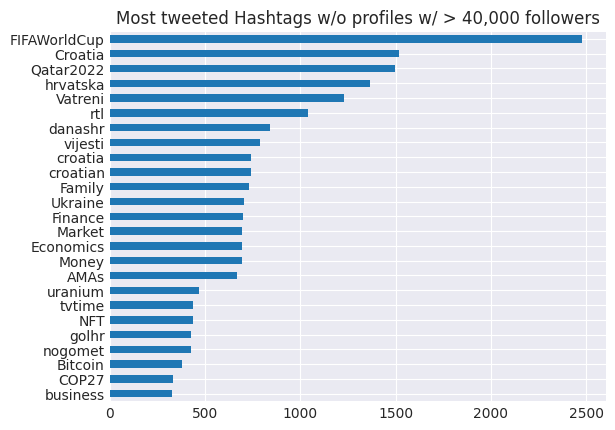

In [39]:
fig, ax = plt.subplots(1, figsize=None)

htag_count = tweets_view[tweets_view['followers_count'] < 40_000]['all_hashtags'].explode().dropna().value_counts()
htag_count.head(25).iloc[::-1].plot.barh(ax=ax)

ax.set_title('Most tweeted Hashtags w/o profiles w/ > 40,000 followers')
plt.show()

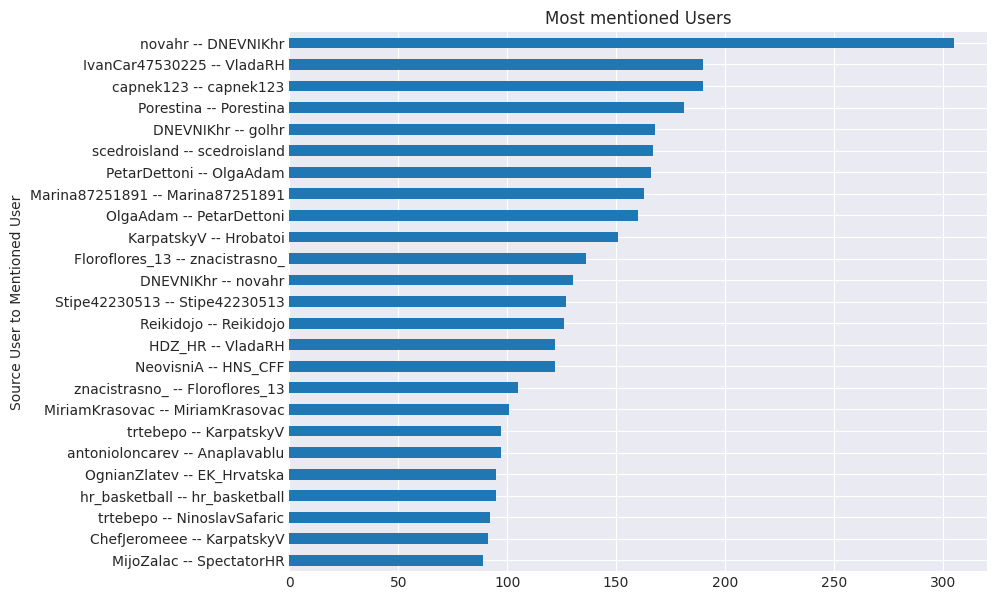

In [41]:
fig, ax = plt.subplots(1, figsize=(9, 7))

ument_count = tweets_view[['user_id', 'user_mentions']].explode('user_mentions').dropna()
ument_count = ument_count.merge(users_view[['user_id', 'screen_name']], how='inner', on='user_id')
ument_count = ument_count.merge(users_view[['user_id', 'screen_name']], how='left', left_on='user_mentions', right_on='screen_name', suffixes=['_source', '_target'])
ument_count = ument_count.groupby(['screen_name_source', 'screen_name_target']).size().sort_values(ascending=False)
ument_count.head(25).iloc[::-1].plot.barh(ax=ax)

ax.set_title('Most mentioned Users')
ax.set_ylabel('Source User to Mentioned User')
ax.set_yticklabels(["{} -- {}".format(src, tgt) for src, tgt in ument_count.head(25).iloc[::-1].index])
plt.show()